In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

In [2]:
#Import CSV
csv = "Sales_Item_Merged.csv"
sales_data = pd.read_csv(csv)
sales_data

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,Item_Add_date
0,I,Industrial,22777,USHER OIL COMPANY,MI,3/18/2019,1000ABS550,ACTIV VIII,8,1750.56,10,AC8000 MOD,A,6/12/2015
1,I,Industrial,22777,USHER OIL COMPANY,MI,5/21/2019,1000ABS550,ACTIV VIII,8,1838.08,10,AC8000 MOD,A,6/12/2015
2,I,Industrial,22777,USHER OIL COMPANY,MI,2/11/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,6/12/2015
3,I,Industrial,22777,USHER OIL COMPANY,MI,4/6/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,6/12/2015
4,I,Industrial,22777,USHER OIL COMPANY,MI,8/19/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,6/12/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24374,I,Industrial,1801,MSP INDUSTRIES,MI,9/27/2019,ZS401,BRUSH-SPIRAL WRAP SCRUB BRUSH,2,1139.50,ZS,PDQ PARTS,A,9/24/2019
24375,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS402,BRUSH-HI DENSITY SCRUB BRUSH,2,822.50,ZS,PDQ PARTS,A,10/11/2019
24376,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS403,BRUSH-SIDE SCRUB BRUSH,1,207.00,ZS,PDQ PARTS,A,10/11/2019
24377,I,Industrial,12663,"LIBERTY STEEL INDUSTRIES, INC.",OH,10/24/2019,ZS404,BRUSH-GRIT SIDE SCRUB BRUSH.,1,469.00,ZS,PDQ PARTS,A,10/14/2019


In [3]:
sales_data['year'] = pd.DatetimeIndex(sales_data['Date_Invoice']).year.astype(object)
sales_data

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,Item_Add_date,year
0,I,Industrial,22777,USHER OIL COMPANY,MI,3/18/2019,1000ABS550,ACTIV VIII,8,1750.56,10,AC8000 MOD,A,6/12/2015,2019
1,I,Industrial,22777,USHER OIL COMPANY,MI,5/21/2019,1000ABS550,ACTIV VIII,8,1838.08,10,AC8000 MOD,A,6/12/2015,2019
2,I,Industrial,22777,USHER OIL COMPANY,MI,2/11/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,6/12/2015,2020
3,I,Industrial,22777,USHER OIL COMPANY,MI,4/6/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,6/12/2015,2020
4,I,Industrial,22777,USHER OIL COMPANY,MI,8/19/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,6/12/2015,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24374,I,Industrial,1801,MSP INDUSTRIES,MI,9/27/2019,ZS401,BRUSH-SPIRAL WRAP SCRUB BRUSH,2,1139.50,ZS,PDQ PARTS,A,9/24/2019,2019
24375,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS402,BRUSH-HI DENSITY SCRUB BRUSH,2,822.50,ZS,PDQ PARTS,A,10/11/2019,2019
24376,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS403,BRUSH-SIDE SCRUB BRUSH,1,207.00,ZS,PDQ PARTS,A,10/11/2019,2019
24377,I,Industrial,12663,"LIBERTY STEEL INDUSTRIES, INC.",OH,10/24/2019,ZS404,BRUSH-GRIT SIDE SCRUB BRUSH.,1,469.00,ZS,PDQ PARTS,A,10/14/2019,2019


In [4]:
twenty_19_sales = sales_data.loc[sales_data['year']== 2019]
twenty_20_sales = sales_data.loc[sales_data['year']== 2020]
twenty_19_sales

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,Item_Add_date,year
0,I,Industrial,22777,USHER OIL COMPANY,MI,3/18/2019,1000ABS550,ACTIV VIII,8,1750.56,10,AC8000 MOD,A,6/12/2015,2019
1,I,Industrial,22777,USHER OIL COMPANY,MI,5/21/2019,1000ABS550,ACTIV VIII,8,1838.08,10,AC8000 MOD,A,6/12/2015,2019
9,C,Contract,20930,CHARLOTTE PRODUCTS LTD.,IL,10/4/2019,1000CUS026,SAFE CLEAN 319000-18,26,487.76,10,AC8000 MOD,A,1/19/2015,2019
10,C,Contract,20930,CHARLOTTE PRODUCTS LTD.,IL,3/4/2019,1000CUS026,SAFE CLEAN 319000-18,25,463.00,10,AC8000 MOD,A,1/19/2015,2019
13,I,Industrial,16630,"ADREM,INC.",MI,4/25/2019,1000OID550,CLEAN EASE,8,1845.68,10,AC8000 MOD,A,12/30/1994,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24373,I,Industrial,12663,"LIBERTY STEEL INDUSTRIES, INC.",OH,9/23/2019,ZS400,BRUSH-SPIRAL WRAP GRIT BRUSH,2,1338.00,ZS,PDQ PARTS,A,8/19/2019,2019
24374,I,Industrial,1801,MSP INDUSTRIES,MI,9/27/2019,ZS401,BRUSH-SPIRAL WRAP SCRUB BRUSH,2,1139.50,ZS,PDQ PARTS,A,9/24/2019,2019
24375,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS402,BRUSH-HI DENSITY SCRUB BRUSH,2,822.50,ZS,PDQ PARTS,A,10/11/2019,2019
24376,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS403,BRUSH-SIDE SCRUB BRUSH,1,207.00,ZS,PDQ PARTS,A,10/11/2019,2019


In [5]:
category_sales_2019 = twenty_19_sales.groupby(['category']).sum()
category_sales_2020 = twenty_20_sales.groupby(['category']).sum()

In [6]:
twenty19_cat = len(category_sales_2019)
twenty20_cat = len(category_sales_2020)
twenty19_high = category_sales_2019['qty_ship'].max()
twenty20_high = category_sales_2020['qty_ship'].max()

In [7]:
twenty19_labels = category_sales_2019.index
twenty20_labels = category_sales_2020.index
print(twenty19_labels)

Index(['1 Prt Conc', 'AB/BLDRS', 'AB/SURF', 'AC8000 HD', 'AC8000 MOD',
       'AC8000 NTR', 'ACID CLNRS', 'ACID-INORG', 'AG OILBASE', 'AG-FOAMERS',
       'AG-MISC.', 'AIRX PROD', 'ALKALI-LIQ', 'ANIONIC', 'BTLS-1FSTL',
       'BTLS-1GLRD', 'BTLS-QT', 'BUILDERS', 'CAP, 1 GL', 'CAP,1QT/PT',
       'CAP,PL CLR', 'CAP,PL UNC', 'CAPS,MISC.', 'CMA CARPET', 'COMBO,PLN',
       'CTN,2.5GL', 'CTN,4GL', 'CTN,QT', 'D-LIM CLNR', 'DEMO,MTRLS',
       'DEODORIZER', 'DISHWASH', 'DIVIDERS', 'DRUMS,55GL', 'DRUMS<55GL',
       'ENVIROCLNR', 'ENZYMATIC', 'EPA - MISC', 'EPA-QT NTR', 'EPA-QT>8.1',
       'EUROPRO', 'FF-CONVNTL', 'FF-HI SPD', 'FF-SPECIAL', 'FLR MAINT',
       'FLR SEALER', 'FLR STRPRS', 'FLRL/SPICE', 'FUEL SRCHG', 'GLASS CLNR',
       'HAIR/BODY', 'IHP P/S', 'JEL CLNR', 'KARCHER', 'LAUNDRY', 'LUBRICANTS',
       'M-PYRL PRD', 'MISC PARTS', 'MISC SPEC', 'MISC.', 'NO8000 HD',
       'NOACIDCOIL', 'NON8000MOD', 'NON8000NTR', 'NONCMACRPT', 'NONIONIC',
       'NONMFG ITM', 'NONMFG R/M', 'NONPOL 

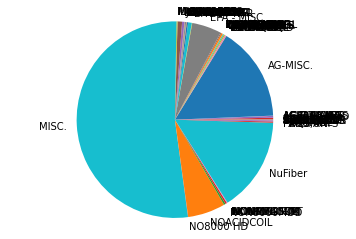

In [9]:
plt.pie(category_sales_2019['qty_ship'], labels = twenty19_labels)
plt.axis("equal")
plt.show()

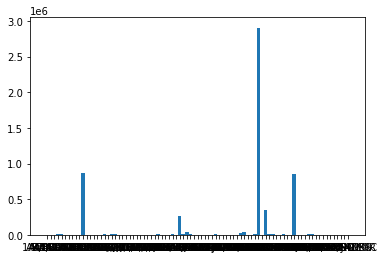

In [11]:
plt.bar(height = category_sales_2019['qty_ship'], x = twenty19_labels, width = 1)
plt.show()